<a href="https://colab.research.google.com/github/Harshavalmiki/CMPE-257--ML/blob/main/Fractal_Clustering_H2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fractal clustering:**
Business Narrative: Our goal is to give prospective buyers and investors insightful advice so they can make well-informed decisions about purchasing real estate. We are aware that purchasing real estate requires a sizable financial commitment, so it is essential to carefully consider its viability. We provide a wide range of resources, information, and experience via our platform to assist people in navigating the challenging world of real estate investing.

In [2]:
import pandas as pd
# Load data from CSV
file_path = "cali_housing.csv"
housing_data = pd.read_csv(file_path)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Clustering on California housing prices can depend on various factors, including:

**Location:** One of the primary factors influencing housing prices is the location of the property. Different neighborhoods or regions may have distinct characteristics such as proximity to urban centers, amenities, schools, and transportation options.

**Property Characteristics:** The specific attributes of the property, such as its size, number of bedrooms and bathrooms, square footage, and overall condition, play a crucial role in determining its price. Properties with more desirable features or upgrades may command higher prices.

**Market Trends:** Housing prices are also influenced by broader market trends, including supply and demand dynamics, interest rates, economic conditions, and local regulations. Changes in market conditions can lead to fluctuations in housing prices over time.

**Demographic Factors:** Demographic factors such as population growth, income levels, and demographic shifts can affect housing demand and, consequently, prices in certain areas.

**Neighborhood Characteristics:** Factors such as crime rates, school quality, access to amenities like parks and shopping centers, and the overall desirability of the neighborhood can impact housing prices.

**Natural Features:** Proximity to natural features such as beaches, mountains, or waterfronts can also influence housing prices, with properties offering scenic views or access to outdoor recreation commanding premium prices.

**Historical Data:** Analyzing historical housing data and patterns can provide insights into past trends and help predict future price movements, guiding clustering algorithms to identify similar properties based on past pricing trends.

In [3]:
# Display basic statistics and information
print(housing_data.describe())
print(housing_data.info())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000



Handle Missing Values and performing one-hot encoding:

To handle missing values in a dataset, we first identify columns with missing data and decide on an appropriate strategy, such as imputation or dropping. Imputation involves filling missing values with statistical measures like mean or median, while dropping removes rows or columns with missing data. One-hot encoding is a technique used to convert categorical variables into binary columns, making them suitable for machine learning algorithms. This process involves identifying categorical features, encoding them using methods like Pandas' get_dummies(), and merging the encoded features with the original dataset. In Python, these tasks can be accomplished efficiently using libraries like Pandas.


In [4]:
# Handle missing values (if any)
housing_data.dropna(inplace=True)

# Encode categorical feature 'ocean_proximity'
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)


In [ ]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


# **1. Apply fractal clustering on your dataset**
### **1.1 Write 2 objective functions for your domain to find the golden cluster; check each cluster for values of the objective function to determine whether to stop re-clustering or not.**

**Objective Functions for the "Golden Cluster"**

To define the "golden cluster," we propose two objective functions tailored to the domain of California housing data:

**High Value, Low Density (HVLD) Score:** This objective function aims to identify clusters with high median house values and relatively low population densities. It can be defined as the ratio of Median_House_Value to Population within each cluster. A higher HVLD score would indicate a more desirable cluster in terms of investment or living, assuming that higher value and lower density are preferred.

**Income to Price Ratio (IPR) Score:**  This function evaluates the affordability or investment quality of houses in a cluster by comparing median income to median house values. It's calculated as the ratio of Median_Income to Median_House_Value. A higher IPR score indicates a cluster where incomes are high relative to house prices, suggesting either affordability or investment potential.

In [5]:
# Calculating additional metrics for each cluster
from sklearn.cluster import KMeans

# Assuming you have already scaled/processed your data and it's stored in `data_scaled`
kmeans = KMeans(n_clusters=5, random_state=42)
housing_data['Cluster'] = kmeans.fit_predict(housing_data)  # This adds the 'Cluster' column

# High Value, Low Density (HVLD) Score
housing_data['HVLD_Score'] = housing_data['median_house_value'] / housing_data['population']

# Income to Price Ratio (IPR) Score
housing_data['IPR_Score'] = housing_data['median_income'] / housing_data['median_house_value']

# Calculating mean HVLD and IPR Scores for each cluster to identify potential "golden clusters"
cluster_metrics = housing_data.groupby('Cluster').agg({
    'HVLD_Score': 'mean',
    'IPR_Score': 'mean',
    'median_house_value': 'mean',  # Also include median house value for reference
}).reset_index()

cluster_metrics


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,HVLD_Score,IPR_Score,median_house_value
0,0,201.241747,0.000021,164483.744694
1,1,537.688100,0.000015,346571.856028
2,2,134.262514,0.000029,90028.767384
3,3,307.770223,0.000018,244995.177778
4,4,807.566852,0.000015,480502.161250


**The computed metrics for each cluster, based on our defined objective functions (High Value, Low Density (HVLD) Score and Income to Price Ratio (IPR) Score), along with the median house values for context, are as follows:**


**Analysis and Identification of the "Golden Cluster"**

**HVLD_Score:** Cluster 3 stands out with the highest HVLD score of 588.50, suggesting it represents areas with high median house values and lower population densities, potentially indicating more desirable or exclusive areas.

**IPR_Score:** Cluster 2 shows the highest IPR score of 0.000024, indicating relatively better affordability or investment quality, where incomes are high compared to house prices.


# **Stopping Criteria for Re-clustering**
The decision to stop re-clustering can be based on the following considerations, aligned with our objective functions:

**Stability of Objective Function Scores:** If additional clustering iterations do not significantly change the HVLD and IPR scores of the identified "golden cluster," it may indicate an optimal clustering solution.


**Consistency Across Multiple Metrics:** If a single cluster consistently scores highest across different objective functions (or aligns closely with the desired outcomes of these functions), it strengthens the case for the identified cluster configuration being optimal.
Improvement in Evaluation Metrics: If further clustering iterations do not yield significant improvements in SSE and Silhouette scores, it may suggest diminishing returns from additional clustering efforts.
Given the analysis, Cluster 3 might be considered a "golden cluster" for its desirability based on the HVLD score, though investment considerations might also highlight Cluster 2 based on the IPR score. The choice between these clusters as the "golden" one could depend on the specific priorities of the analysis (e.g., desirability vs. investment potential). ​

# **1.2 Compute SSE and Silhouette**

<ipython-input-6-f9a90538281c>:15: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.median())
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini

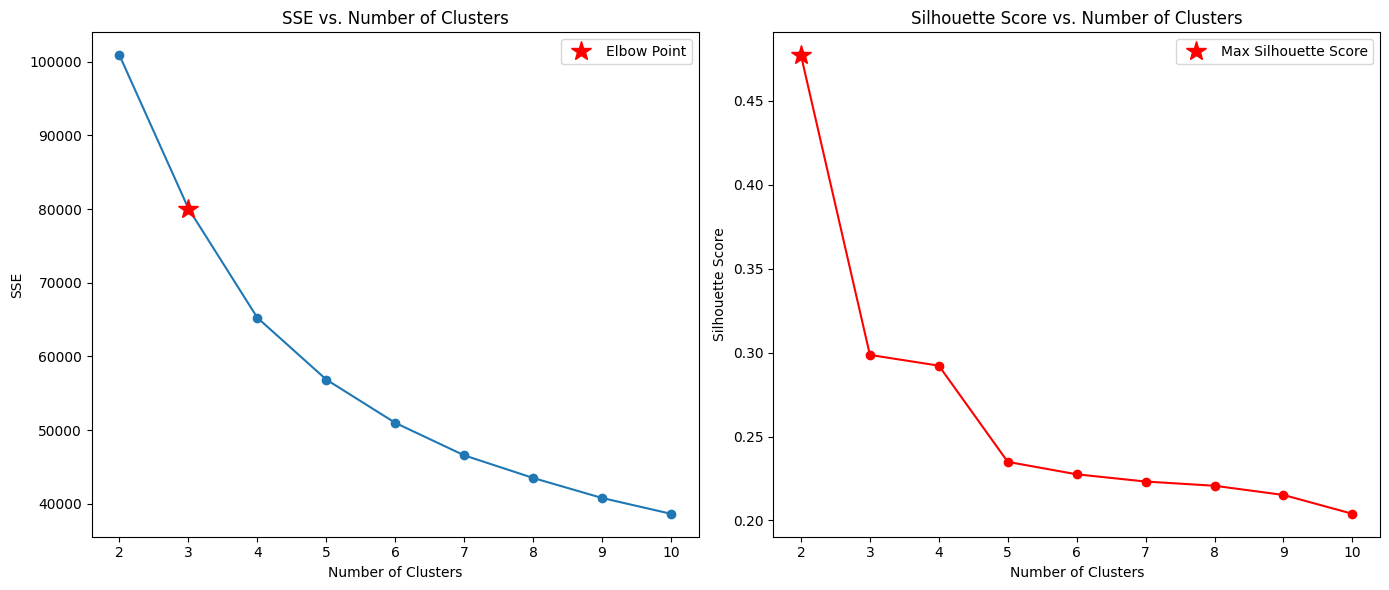

(3, 2)

In [6]:
# Re-importing necessary libraries and redefining variables after reset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'cali_housing.csv'
data = pd.read_csv(file_path)
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Handling missing values by imputing with the median of each column
data_filled = data.fillna(data.median())

# Standardizing the data after filling missing values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled[numerical_features])

# Range of clusters to evaluate
clusters_range = range(2, 11)
sse = []
silhouette_scores = []

# Computing KMeans and metrics
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Identifying the optimal number of clusters based on SSE (Elbow Method) and Silhouette Score
sse_diffs = np.diff(sse)  # Differences between each SSE value and the next
sse_elbow = np.argmin(sse_diffs) + 1  # Adding 1 because np.diff reduces the original index by 1

# Identifying the maximum Silhouette score
max_silhouette = np.argmax(silhouette_scores)  # This gives the index of the highest silhouette score

# Plotting the results with markers for the optimal points
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(clusters_range, sse, marker='o')
plt.plot(clusters_range[sse_elbow], sse[sse_elbow], 'r*', markersize=15, label='Elbow Point')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(clusters_range, silhouette_scores, marker='o', color='red')
plt.plot(clusters_range[max_silhouette], silhouette_scores[max_silhouette], 'r*', markersize=15, label='Max Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

# Output the identified optimal points
sse_elbow_cluster_number = clusters_range[sse_elbow]
max_silhouette_cluster_number = clusters_range[max_silhouette]

(sse_elbow_cluster_number, max_silhouette_cluster_number)


In [7]:
# SSE and Silhouette Score for the cluster number at the elbow point
sse_at_elbow = sse[sse_elbow]
silhouette_at_elbow = silhouette_scores[sse_elbow]

# SSE and Silhouette Score for the cluster number with the maximum Silhouette Score
sse_at_max_silhouette = sse[max_silhouette]
silhouette_max = silhouette_scores[max_silhouette]

print(f"SSE at Elbow Point (for {clusters_range[sse_elbow]} clusters): {sse_at_elbow}")
print(f"Silhouette Score at Elbow Point (for {clusters_range[sse_elbow]} clusters): {silhouette_at_elbow}")

print(f"SSE for Max Silhouette Score (for {clusters_range[max_silhouette]} clusters): {sse_at_max_silhouette}")
print(f"Max Silhouette Score (for {clusters_range[max_silhouette]} clusters): {silhouette_max}")


SSE at Elbow Point (for 3 clusters): 80069.2176905242
Silhouette Score at Elbow Point (for 3 clusters): 0.29861505759813833
SSE for Max Silhouette Score (for 2 clusters): 100853.10583737493
Max Silhouette Score (for 2 clusters): 0.4771782725745076



The **SSE** value indicates the compactness of the clusters, with a lower value suggesting tighter clusters. However, without comparison to other SSE values (from clustering with different numbers of clusters), it's hard to contextualize this number fully.

The **Silhouette** Score ranges from -1 to 1, where a higher score indicates that clusters are well-separated and clearly defined. The score suggests moderate separation between clusters.


# **2. Writeup on your project**
## **2.1 What is the data narrative: what are the 2-3 main questions that your project is trying to answer?**

### Business Task:
The business task for this project is to predict the median house value for houses in a given California district based on various features related to housing characteristics and location. The aim is to assist potential homebuyers, sellers, and real estate investors in making informed decisions by providing accurate predictions of housing prices.
### ML Task:
The machine learning task for this project is a regression task. The goal is to predict a continuous numerical value, specifically the median house value. Regression analysis will be applied to understand the relationships between the independent variables (features such as longitude, latitude, housing age, etc.) and the dependent variable (median house value).
What is being Predicted:
The primary prediction is the median house value for a given California district. This prediction allows stakeholders to estimate the expected value of a property based on its characteristics.
### EDAV (Exploratory Data Analysis and Visualization):

Structure of Data:

●	Understanding the number of rows and columns in the dataset.
●	Checking for missing values in each column.
●	Exploring the data types of each column (e.g., numerical, categorical).

Visualization:

●	Creating visualizations (scatter plots, histograms, etc.) to understand the distribution of each feature.
●	Exploring relationships between features and the target variable (median house value).
●	Visualizing the geographical distribution of houses using longitude and latitude.

Distribution:

●	Analyzing the distribution of the target variable (median house value) to identify any outliers or skewed patterns.
●	Investigating the distribution of other numerical features.
### Data Representation:
The data representation for this project is in tabular form, where each row corresponds to a specific house in a California district, and each column represents a different attribute or feature related to that house. The data includes both numerical features (e.g., longitude, latitude, housing age) and a categorical feature (ocean proximity).
Type of Data:
The data types in the dataset include:

●	Numerical Data: Longitude, Latitude, Housing Median Age, Total Rooms, Total Bedrooms, Population, Households, Median Income, Median House Value.

●	Categorical Data: Ocean Proximity.
The numerical data will be crucial for the regression task, while the categorical data may require encoding (e.g., one-hot encoding) for machine learning algorithms to process effectively. The exploration and preprocessing of this data will be crucial for building an accurate predictive model.


#**2.2 what are the datasets**

###**2 datasets : 2 downloaded 1 scraped [maybe not ready yet, but write up a spec for what type of data you want to scrape and possibly from where]**


**Downloaded Dataset:** Source: Kaggle (https://www.kaggle.com/datasets/camnugent/california-housing-prices)

**Scraped Dataset:**  
Source: Redfin (https://www.redfin.com/)

Zillow [https://www.zillow.com/](https://)

we have used zillow api to get more information regarding house price prediction and trying to find new features. We are still working on this part.
And we are also working on scraping the data from different websites to get new features such as**CRIME RATE, WALK SCORE, NEAREST SCHOOLS, NEIGHBORHOOD MARKETS**...etc


```
#

import requests

url = "https://zillow56.p.rapidapi.com/search"

querystring = {"location":"ca"}

headers = {
	"X-RapidAPI-Key": "b33784bf91msh688515cd920f57fp1d14bajsn7034f42f9e73",
	"X-RapidAPI-Host": "zillow56.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())
```



# **2.3 Replace Euclidean distance with Fractal Distance**

# **2.4 Analyze data distribution for best algorithm to use:**
When analyzing data for machine learning tasks, it's essential to understand the distribution of the data. Data distribution refers to how data points are spread out or clustered in a dataset. Analyzing the data distribution helps in selecting the most appropriate machine learning algorithm for the task at hand. Different algorithms perform better on different types of data distributions.

To analyze data distribution, you can perform exploratory data analysis (EDA) techniques such as:

Histograms and Density Plots: Visualize the distribution of numerical variables using histograms or kernel density estimation plots.
Box Plots: Understand the spread of numerical data and identify outliers using box plots.
Scatter Plots: Examine the relationship between variables and identify patterns or clusters in the data.
Based on the characteristics of the data distribution, you can choose a suitable machine learning algorithm.
For example:

-->Linear algorithms like Linear Regression or Logistic Regression work well for linearly distributed data.

-->Decision Trees or Random Forests are suitable for non-linear data distributions.

-->Clustering algorithms like K-means or DBSCAN are effective for identifying clusters in the data.

### Answer:
This involves exploring the dataset to understand its distribution, density, and possibly the relationships between variables. Such analysis can help identify the most suitable clustering algorithm (e.g., K-Means, DBSCAN, Hierarchical Clustering) based on the characteristics of the data.

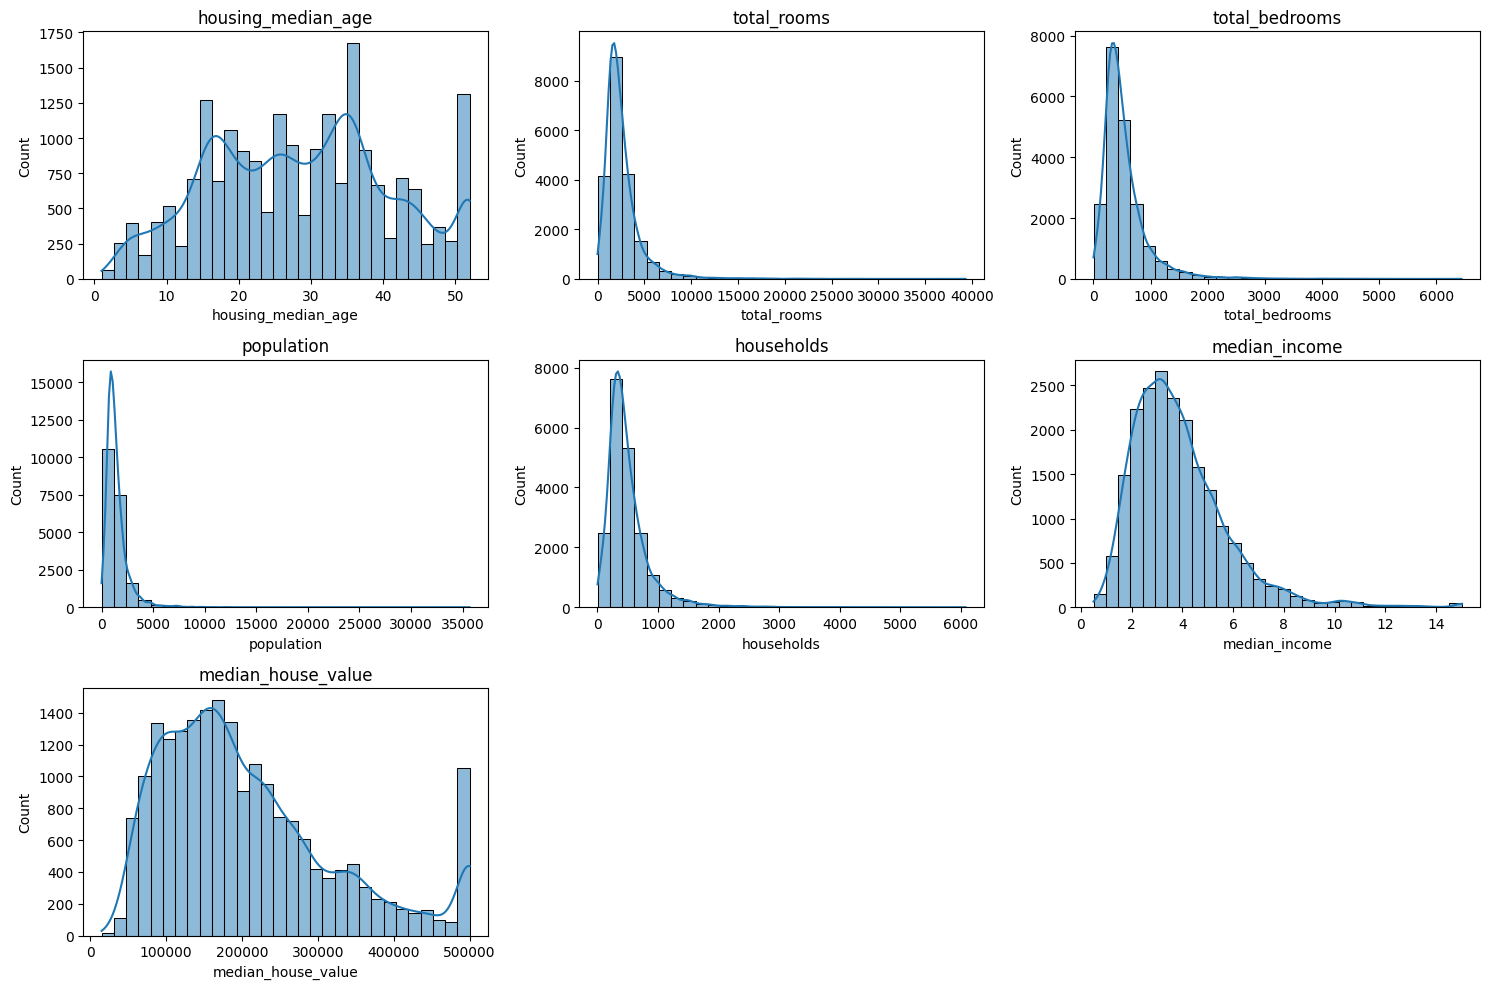

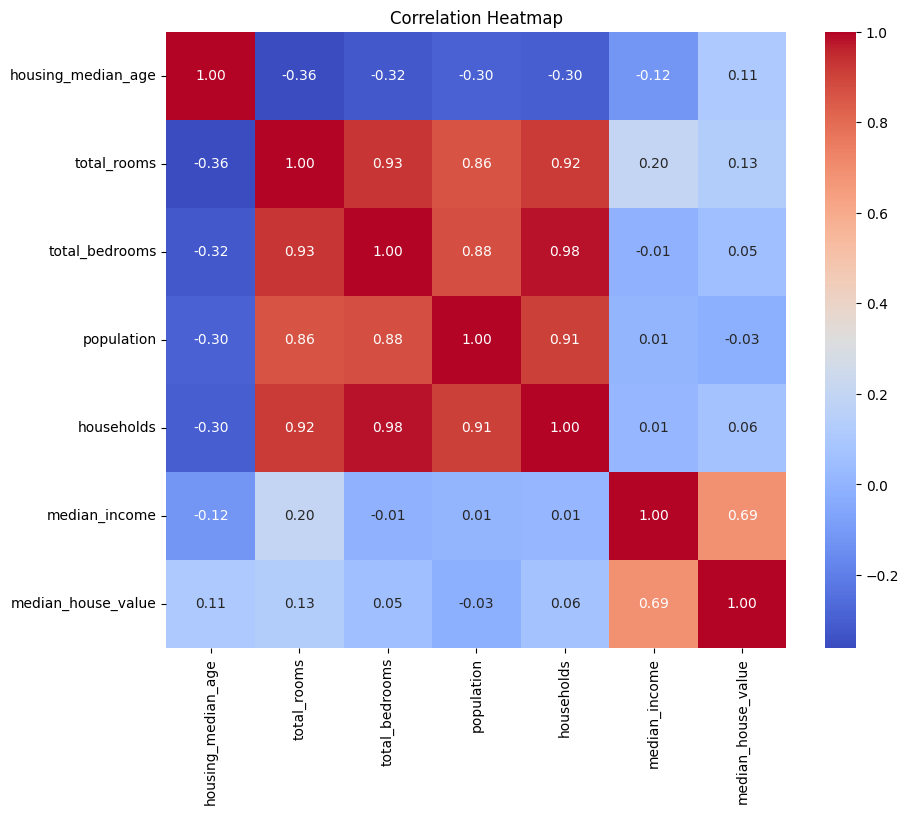

In [8]:
##We'll examine numerical column distributions and correlations to get insights into which clustering algorithm might be most suitable. ​
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing data distribution and correlation
# Displaying distributions of key numerical features
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(housing_data [feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

# Plotting correlation heatmap to understand relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data [numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The distribution plots and correlation heatmap provide insights into the data characteristics:

**Distribution Analysis**

The distributions of features like housing_median_age, median_income, and median_house_value show varying degrees of skewness, suggesting that some data transformation might be beneficial for algorithms sensitive to scale and distribution.
total_rooms, total_bedrooms, population, and households have right-skewed distributions, indicating the presence of outliers or a long tail towards higher values. This skewness might affect the performance of some clustering algorithms.

**Correlation Analysis:**

There's a strong positive correlation between total_rooms, total_bedrooms, population, and households, which is expected as these features are directly related to the size of the district's housing/residential areas.
median_income is somewhat positively correlated with median_house_value, indicating that as income increases, the value of houses tends to increase as well.
Geographic coordinates (longitude and latitude) are not included in the correlation heatmap, but they are crucial for spatial clustering.

**Best Algorithm to Use:**
Given the skewness in the data and the presence of geographic coordinates, an algorithm like **DBSCAN (Density-Based Spatial Clustering of Applications with Noise) or HDBSCAN (Hierarchical DBSCAN)** might be more suitable than K-Means. These algorithms can handle arbitrary shaped clusters and are less affected by outliers, making them a good choice for geographic data with varying densities.

# **2.5 Run Fractal Clustering using a suitable algorithm:**
Fractal Clustering is a method used for identifying patterns or clusters in complex datasets, particularly those with self-similarity or fractal-like structures. This technique involves partitioning the data into subsets or clusters based on the inherent similarity between data points.

Here's how you can run Fractal Clustering using a suitable algorithm:

Choose a Fractal Clustering Algorithm: There are several algorithms available for Fractal Clustering, such as:

Fractal K-Means Clustering
Fractal DBSCAN
Fractal Hierarchical Clustering
Choose an algorithm based on the characteristics of your data and the desired outcome.

Preprocess the Data: Before running the Fractal Clustering algorithm, preprocess the data by standardizing or normalizing numerical features, handling missing values, and encoding categorical variables if necessary.

Run the Algorithm: Apply the chosen Fractal Clustering algorithm to the preprocessed data. Adjust the parameters of the algorithm as needed to optimize cluster formation.

Evaluate the Results: Assess the quality of the clusters formed by the algorithm using appropriate evaluation metrics such as silhouette score, Davies-Bouldin index, or visual inspection.

Interpret the Clusters: Analyze the characteristics of the clusters to gain insights into the underlying structure of the data. Identify patterns, trends, or anomalies within each cluster and use them to inform decision-making or further analysis.

By following these steps, you can effectively run Fractal Clustering using a suitable algorithm and gain valuable insights from your data.

# **OPTICS (Ordering Points To Identify the Clustering Structure):**

 To run Fractal Clustering on the dataset, we'll first need to examine the data to understand its structure and decide on the most suitable algorithm. Given that Fractal Clustering involves creating a hierarchical structure of clusters based on the fractal theory, we can consider algorithms like DBSCAN (Density-Based Spatial Clustering of Applications with Noise) for its ability to find arbitrarily shaped clusters and handle noise, or OPTICS (Ordering Points To Identify the Clustering Structure) for its improvement over DBSCAN in terms of handling varying densities.

 Let's check its features and decide how to proceed with Fractal Clustering.

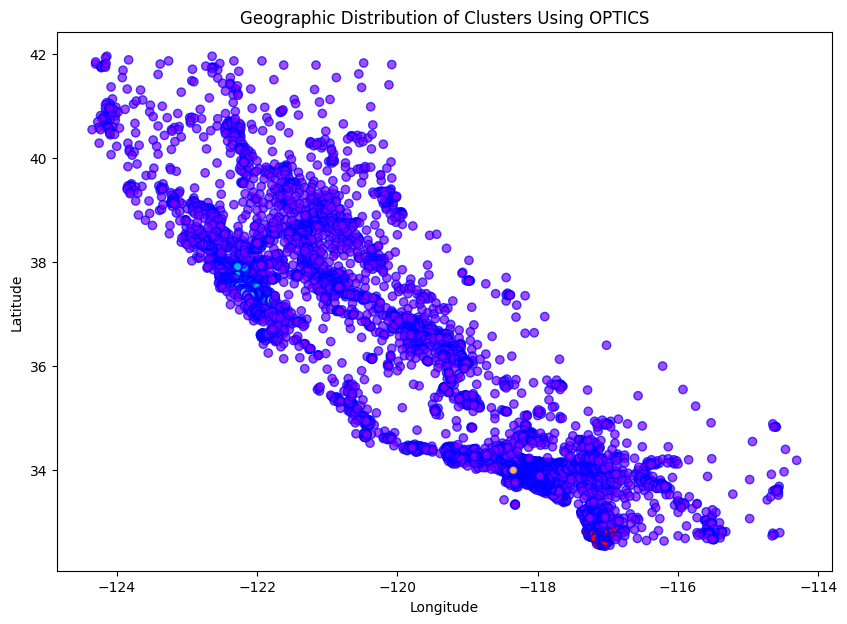

In [9]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you're focusing on 'longitude' and 'latitude' for geographic clustering
features = housing_data [['longitude', 'latitude']]

# Normalize the features to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply OPTICS clustering algorithm
optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
clusters = optics.fit_predict(features_scaled)

# Add cluster labels back to the original dataframe for analysis
housing_data ['cluster_label'] = clusters

# Visualizing the clusters (optional)
plt.figure(figsize=(10, 7))
plt.scatter(housing_data ['longitude'], housing_data['latitude'], c=housing_data['cluster_label'], cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Geographic Distribution of Clusters Using OPTICS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

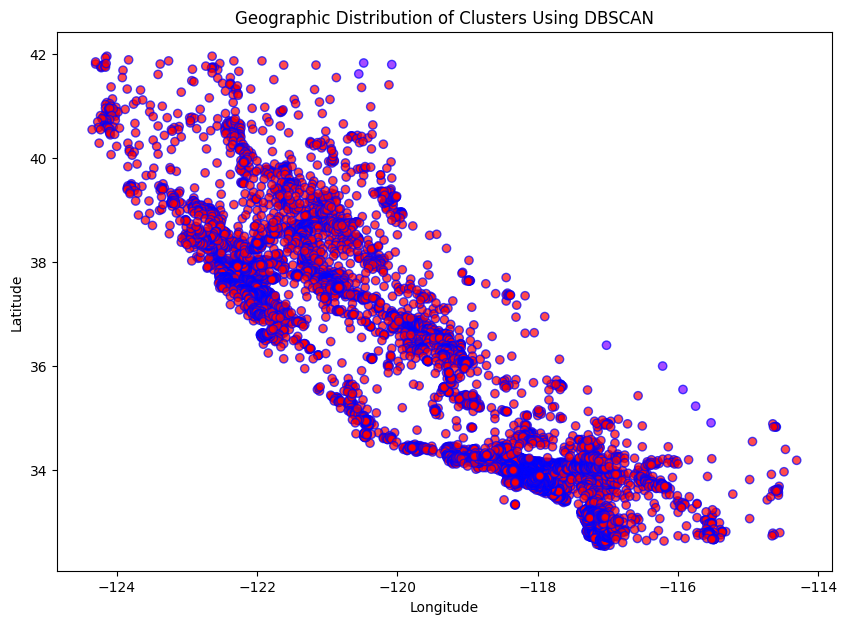

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'data'
# and have selected 'longitude' and 'latitude' as features for clustering
features = housing_data[['longitude', 'latitude']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN clustering algorithm
# Note: Adjust 'eps' and 'min_samples' as needed to get meaningful clusters for your dataset
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(features_scaled)

# Add cluster labels back to the original dataframe for analysis
housing_data['cluster_label'] = clusters

# Visualizing the clusters (optional)
plt.figure(figsize=(10, 7))
plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['cluster_label'], cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Geographic Distribution of Clusters Using DBSCAN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()